In [163]:
from scipy.io import wavfile
import IPython
from matplotlib import pyplot as plt
from scipy import io, signal, fft
import numpy as np

In [164]:
samplerate, data = wavfile.read('blackbox.wav')
IPython.display.Audio('blackbox.wav')

/var/folders/v6/mp_2x0491wl0956hn_2fvmm80000gn/T/ipykernel_1273/2596035213.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samplerate, data = wavfile.read('blackbox.wav')


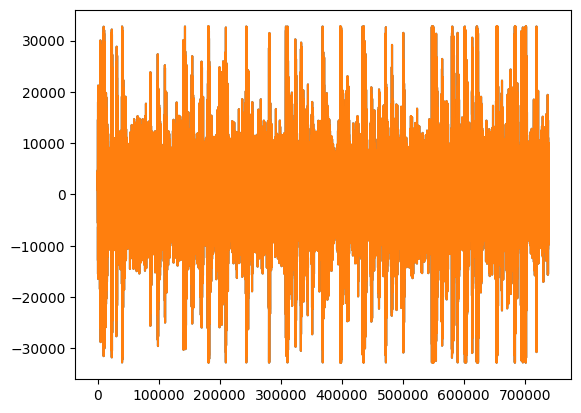

In [165]:
plt.plot(data)

In [166]:
N = len(data)
T = 1. / samplerate
t = np.linspace(0, N*T, N, endpoint=False)

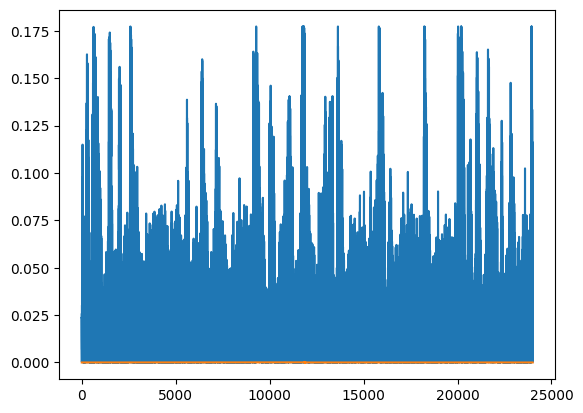

In [167]:
fft1 = fft.fft(data)
xf = fft.fftfreq(N, T)[:N//2]
plt.plot(xf, 2./N * np.abs(fft1[0:N//2]))

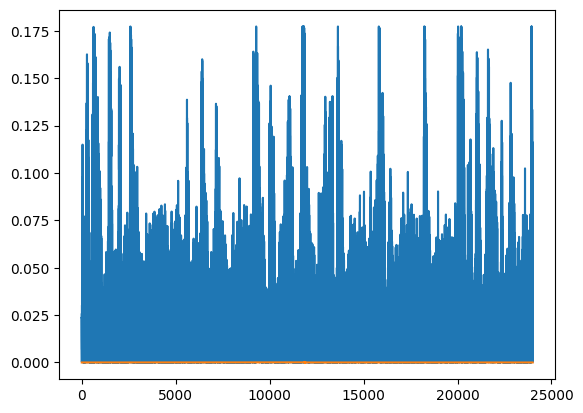

In [168]:
fft1 = fft.fft(data)
xf = fft.fftfreq(N, T)[:N//2]
plt.plot(xf, 2./N * np.abs(fft1[0:N//2]))

(-30.0, 0.0)

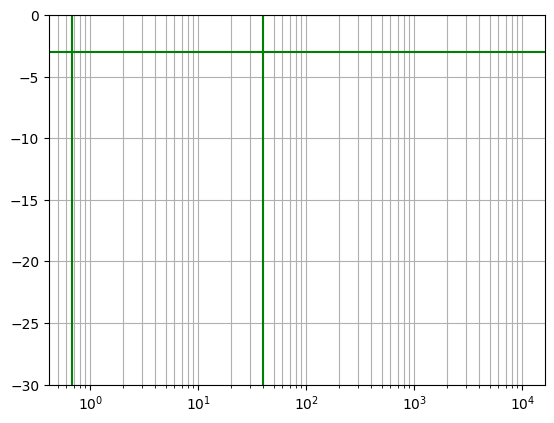

In [229]:

b, a = signal.butter(0,1000 , btype='lowpass', analog=True)
# add more filte

w, h = signal.freqs(b, a)
plt.semilogx(w, 20 * np.log10(abs(h)))
plt.axvline(0.67, color='green')
plt.axvline(40, color='green')
plt.axhline(-3, color='green')
plt.grid(which='both', axis='both')
plt.ylim((-30,0))

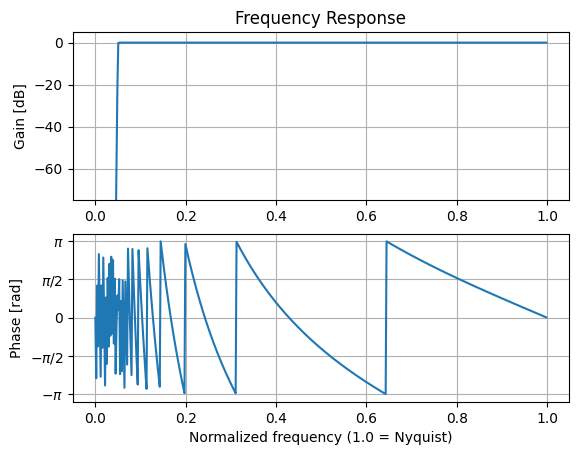

In [245]:
sos = signal.butter(100,  1200, 'hp', fs=samplerate, output='sos')
w, h = signal.sosfreqz(sos)

plt.subplot(2, 1, 1)
db = 20*np.log10(np.maximum(np.abs(h), 1e-5))
plt.plot(w/np.pi, db)
plt.ylim(-75, 5)
plt.grid(True)
plt.yticks([0, -20, -40, -60])
plt.ylabel('Gain [dB]')
plt.title('Frequency Response')
plt.subplot(2, 1, 2)
plt.plot(w/np.pi, np.angle(h))
plt.grid(True)
plt.yticks([-np.pi, -0.5*np.pi, 0, 0.5*np.pi, np.pi],
           [r'$-\pi$', r'$-\pi/2$', '0', r'$\pi/2$', r'$\pi$'])
plt.ylabel('Phase [rad]')
plt.xlabel('Normalized frequency (1.0 = Nyquist)')
plt.show()

In [246]:
filtered = signal.sosfilt(sos, data)

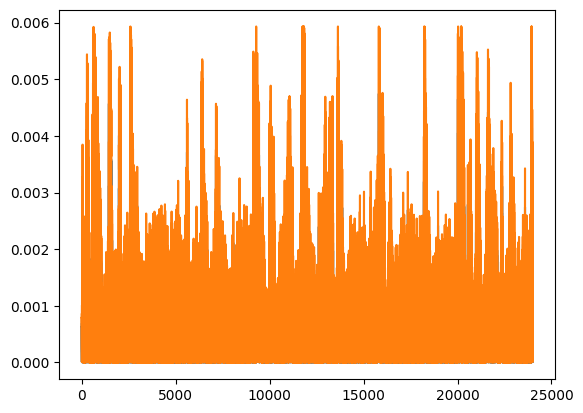

In [247]:
fft1 = fft.fft(filtered)
xf = fft.fftfreq(N, T)[:N//2]
plt.plot(xf, 2./N * np.abs(fft1[0:N//2]))

In [248]:
wavfile.write('output.wav',samplerate,3*filtered.astype(np.int16))

In [249]:
IPython.display.Audio('./output.wav')